In [79]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('dark_background')
import pandas as pd

## Create data from Sklearn

In [80]:
from sklearn.datasets import make_blobs

In [81]:
data = make_blobs(n_samples = 200, n_features = 2, random_state = 42)

In [82]:
type(data)

tuple

In [83]:
data

(array([[ 6.50565335,  2.4470026 ],
        [-5.12894273,  9.83618863],
        [-6.89187396, -7.77736396],
        [-8.32771153, -8.28757337],
        [-7.46899195, -6.0305075 ],
        [-6.13233359, -6.26973933],
        [-2.70155859,  9.31583347],
        [-7.3506655 , -6.64805966],
        [ 4.375222  ,  4.69333885],
        [-6.06676507, -6.25048075],
        [ 3.71294836,  1.91364433],
        [ 4.86733877,  3.28031244],
        [ 5.72293008,  3.02697174],
        [ 4.15451529,  2.05504382],
        [ 2.61473625,  2.159624  ],
        [-7.7086222 , -7.44029063],
        [-2.58120774, 10.01781903],
        [-7.70184759, -6.63642238],
        [ 5.32613903,  0.36045381],
        [-5.29361038, -8.11792509],
        [ 6.76203503,  3.00563494],
        [ 4.16493353,  1.31984045],
        [-6.55690863, -7.70734054],
        [-2.44166942,  7.58953794],
        [-6.19767422, -7.19037635],
        [-3.18611962,  9.62596242],
        [-3.6601912 ,  9.38998415],
        [-7.03141229, -6.291

In [84]:
X = data[0]  # Features of dataset

In [85]:
type(X)

numpy.ndarray

# Use dendrogram method to find the optimal number of clusters

In [86]:
import scipy
from scipy.cluster.hierarchy import dendrogram, linkage

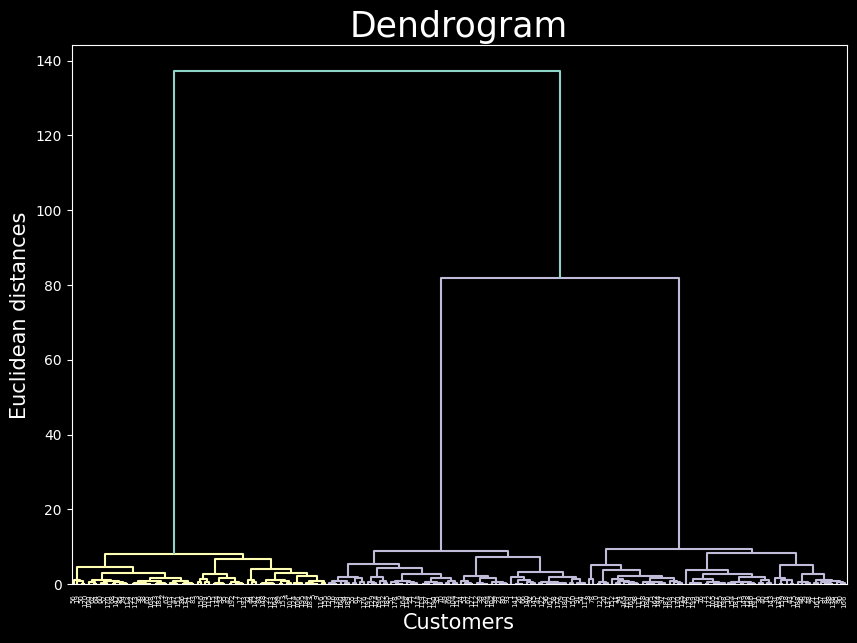

In [87]:
plt.figure(figsize = (10,7))
linkage_data = linkage(X, method='ward', metric='euclidean') # linkage calculates the distance and similarities between samples
                                                        # method "ward" minimize the variance inside the cluster.it is an optimized algo
Dendrogram = dendrogram(linkage_data)
plt.title('Dendrogram', fontsize = 25)
plt.xlabel('Customers', fontsize = 15)
plt.ylabel('Euclidean distances',fontsize = 15)
plt.show()

## Applying Hierarchical Clustering to train the model

In [88]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3) 
y_pred = hc.fit_predict(X)

In [89]:
y_pred

array([0, 2, 1, 1, 1, 1, 2, 1, 0, 1, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 0, 0,
       1, 2, 1, 2, 2, 1, 2, 0, 0, 0, 1, 1, 2, 2, 1, 2, 1, 2, 0, 2, 1, 0,
       1, 0, 0, 1, 0, 2, 1, 2, 1, 2, 2, 2, 1, 0, 2, 0, 1, 2, 1, 1, 1, 1,
       2, 2, 1, 2, 2, 1, 2, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 1, 1, 1, 1, 2,
       0, 1, 0, 2, 2, 2, 0, 1, 2, 0, 0, 2, 1, 1, 2, 1, 2, 0, 1, 0, 0, 1,
       0, 0, 2, 1, 2, 1, 1, 2, 2, 2, 1, 0, 2, 1, 1, 0, 2, 2, 0, 2, 0, 1,
       2, 1, 1, 0, 0, 0, 2, 0, 2, 2, 1, 0, 0, 2, 0, 1, 1, 0, 2, 1, 0, 1,
       0, 1, 1, 2, 0, 0, 2, 0, 0, 1, 2, 0, 0, 2, 1, 0, 1, 2, 0, 1, 2, 0,
       2, 2, 2, 0, 2, 0, 1, 1, 1, 2, 0, 0, 0, 2, 2, 0, 1, 1, 2, 1, 2, 2,
       0, 0])

## Visualize the clusters

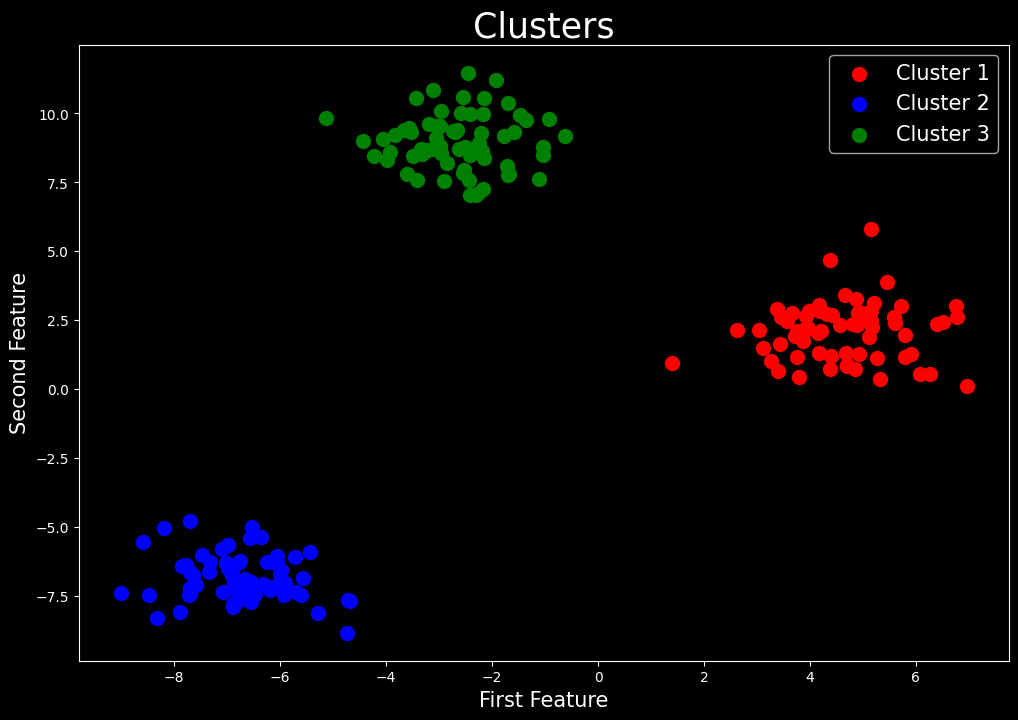

In [90]:
plt.figure(figsize = (12,8))
plt.scatter(X[y_pred == 0, 0], X[y_pred == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_pred == 1, 0], X[y_pred == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_pred == 2, 0], X[y_pred == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.title('Clusters', fontsize = 25)
plt.xlabel('First Feature', fontsize = 15)
plt.ylabel('Second Feature', fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

# Evaluating Hierarchical Clustering performance by Silhouette Score

In [91]:
from sklearn.metrics import silhouette_score

In [92]:
print(f'Silhouette Score(n = 3) : {silhouette_score(X, y_pred)}')

Silhouette Score(n = 3) : 0.8467003894636074


# For two clusters

In [93]:
hc = AgglomerativeClustering(n_clusters = 2)
y_pred = hc.fit_predict(X)
print(f'Silhouette Score(n = 2) : {silhouette_score(X, y_pred)}')

Silhouette Score(n = 2) : 0.7066166034790403


# For four clusters

In [94]:
hc = AgglomerativeClustering(n_clusters = 4)
y_pred = hc.fit_predict(X)
print(f'Silhouette Score(n = 4) : {silhouette_score(X, y_pred)}')

Silhouette Score(n = 4) : 0.6715144332111751


# For five clusters

In [95]:
hc = AgglomerativeClustering(n_clusters = 5)
y_pred = hc.fit_predict(X)
print(f'Silhouette Score(n = 5) : {silhouette_score(X, y_pred)}')

Silhouette Score(n = 5) : 0.4908832391435588
